# Library Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

# Functions

In [2]:
def df_to_list(dataframe):
    ## Outputs to three lists ankle, hand, pocket and the tester 
    ## Assumed: The dataframe is for the same tester and it is ordered by 3 ankles, 3 hands, 3 pockets
    total_list = dataframe[['x_accel', 'y_accel', 'z_accel']].values.tolist()
    
    ankle = total_list[0:3]
    hand = total_list[3:6]
    pocket = total_list[6:9]
    tester = dataframe['tester'].tolist()[0:3] # array of size 3 so easy to plug into GaussianNB
    
    return ankle, hand, pocket, tester

In [3]:
def full_df_to_list(dataframe):
    ## Outputs full list regardless of where data was recorded
    ## Assumed: The dataframe is for the same tester
    total_list = dataframe[['x_accel', 'y_accel', 'z_accel']].values.tolist()
    tester = dataframe['tester'].tolist()

    return total_list, tester

In [4]:
# Runs the test 300 times and returns the average score
def average_score(model, x, y):
    score = 0
    tests = 300
    for i in range(tests):
        x_train, x_valid, y_train, y_valid = train_test_split(x, y)
        model.fit(x_train, y_train)
        score = score + model.score(x_valid, y_valid)
    return (score/tests).round(5)

In [5]:
def gaussian(x, y):
    model = GaussianNB()
    return average_score(model, x, y)

In [6]:
def polyfit(x, y):
    model = make_pipeline(
        PolynomialFeatures(5),
        LinearRegression(fit_intercept=False)
    )
    return average_score(model, x, y)

In [7]:
def neighbors(x, y):
    model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
    )
    return average_score(model, x, y)

In [8]:
def decision(x, y):
    model = DecisionTreeClassifier(max_depth=8)
    return average_score(model, x, y)

In [9]:
def svc(x, y):
    model = make_pipeline(
    PCA(2),
    SVC(kernel='linear', C=2.0)
    )
    return average_score(model, x, y)

In [10]:
def mlp(x, y):
    model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=())
    return average_score(model, x, y)

In [11]:
def triple(data):
    return [data['x_accel'], data['y_accel'], data['z_accel']]

# Data Manipulation

In [12]:
# 0 = ankle, 1 = hand, 2 = pocket
location = pd.DataFrame([0, 0, 0, 1, 1, 1, 2, 2, 2], columns=['location'])

p1_data_mean = pd.read_csv('p1-mean.csv').join(location)
p1_data_std = pd.read_csv('p1-std.csv').join(location)
p2_data_mean = pd.read_csv('p2-mean.csv').join(location)
p2_data_std = pd.read_csv('p2-std.csv').join(location)
p3_data_mean = pd.read_csv('p3-mean.csv').join(location)
p3_data_std = pd.read_csv('p3-std.csv').join(location)
p4_data_mean = pd.read_csv('p4-mean.csv').join(location)
p4_data_std = pd.read_csv('p4-std.csv').join(location)

left_data_mean = pd.read_csv('left-mean.csv').join(location)
left_data_std = pd.read_csv('left-std.csv').join(location)
right_data_mean = pd.read_csv('right-mean.csv').join(location)
right_data_std = pd.read_csv('right-std.csv').join(location)

In [13]:
# Appends all user data into one array per type to do machine learning tests
data_mean = p1_data_mean
data_mean = data_mean.append(p2_data_mean)
data_mean = data_mean.append(p3_data_mean)
data_mean = data_mean.append(p4_data_mean)

data_std = p1_data_std
data_std = data_std.append(p2_data_std)
data_std = data_std.append(p3_data_std)
data_std = data_std.append(p4_data_std)

side_mean = left_data_mean
side_mean = side_mean.append(right_data_mean)
side_std = right_data_std
side_std = side_std.append(right_data_std)

# Stats Tests

In [14]:
# Groups all data by location
# 0 = ankle, 1 = hand, 2 = pocket
data_ankle = data_mean[data_mean['location']==0]
data_hand = data_mean[data_mean['location']==1]
data_pocket = data_mean[data_mean['location']==2]

In [15]:
# ANOVA test to figure out if the means are different
print("x,y,z:", stats.f_oneway(triple(data_ankle.mean()), triple(data_hand.mean()), triple(data_pocket.mean())).pvalue)
print("x:", stats.f_oneway(data_ankle['x_accel'], data_hand['x_accel'], data_pocket['x_accel']).pvalue)
print("y:", stats.f_oneway(data_ankle['y_accel'], data_hand['y_accel'], data_pocket['y_accel']).pvalue)
print("z:", stats.f_oneway(data_ankle['z_accel'], data_hand['z_accel'], data_pocket['z_accel']).pvalue)

x,y,z: 0.4626254658191993
x: 0.09649511028718188
y: 0.0038209906059008055
z: 0.011625717274671406


In [16]:
# Group all data by user
data_p1 = data_mean[data_mean['tester']==1]
data_p2 = data_mean[data_mean['tester']==2]
data_p3 = data_mean[data_mean['tester']==3]

In [17]:
# ANOVA test to figure out if the means are different
print("x,y,z:", stats.f_oneway(triple(data_p1.mean()), triple(data_p2.mean()), triple(data_p3.mean())).pvalue)
print("x:", stats.f_oneway(data_p1['x_accel'], data_p2['x_accel'], data_p3['x_accel']).pvalue)
print("y:", stats.f_oneway(data_p1['y_accel'], data_p2['y_accel'], data_p3['y_accel']).pvalue)
print("z:", stats.f_oneway(data_p1['z_accel'], data_p2['z_accel'], data_p3['z_accel']).pvalue)

x,y,z: 0.46475862442251603
x: 1.051713939742751e-05
y: 0.00038442818710080856
z: 0.17990718889018542


In [18]:
# Group all data by side
# 3 = left, 4 = right
data_left = left_data_mean[left_data_mean['tester']==3]
data_right = right_data_mean[right_data_mean['tester']==4]

In [19]:
# ANOVA test to figure out if the means are different
print("x,y,z:", stats.f_oneway(triple(data_left.mean()), triple(data_right.mean())).pvalue)
print("x:", stats.f_oneway(data_left['x_accel'], data_right['x_accel']).pvalue)
print("y:", stats.f_oneway(data_left['y_accel'], data_right['y_accel']).pvalue)
print("z:", stats.f_oneway(data_left['z_accel'], data_right['z_accel']).pvalue)

x,y,z: 0.7814905995850858
x: 4.7233443592560244e-07
y: 0.5368267254472878
z: 0.5302982309315358


# Machine Learning Classfiers

In [20]:
# Runs each classifier with each test
g_data = []; n_data = []; d_data = []; s_data = []; m_data = []

g_data.append(gaussian(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
n_data.append(neighbors(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
d_data.append(decision(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
s_data.append(svc(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))
m_data.append(mlp(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['location']))

g_data.append(gaussian(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
n_data.append(neighbors(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
d_data.append(decision(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
s_data.append(svc(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))
m_data.append(mlp(data_mean[['x_accel', 'y_accel', 'z_accel']], data_mean['tester']))

g_data.append(gaussian(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
n_data.append(neighbors(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
d_data.append(decision(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
s_data.append(svc(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))
m_data.append(mlp(side_mean[['x_accel', 'y_accel', 'z_accel']], side_mean['tester']))

In [21]:
rows = ['location', 'tester', 'side']
data = np.array([rows, g_data, n_data, d_data, s_data, m_data])
data = data.transpose()

In [22]:
results =  pd.DataFrame(data, columns =['Test', 'Gaussian', 'Neighbors', 'Decision', 'SVC', 'MLP'])
results = results.set_index('Test')

# Charts and Graphics

In [23]:
results

,Gaussian,Neighbors,Decision,SVC,MLP
Test,,,,,
location,0.52852,0.52111,0.77852,0.55667,0.76037
tester,0.90556,0.61778,0.81,0.62,0.87444
side,0.90733,0.61333,0.94067,0.34133,0.92267


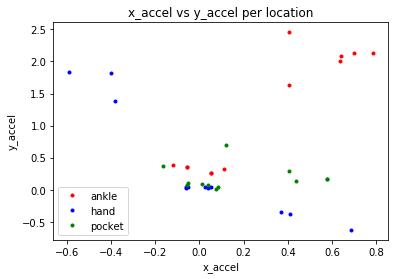

In [24]:
# X and Y values by location
plt.plot(data_ankle['x_accel'], data_ankle['y_accel'], "r.", label='ankle')
plt.plot(data_hand['x_accel'], data_hand['y_accel'], "b.", label='hand')
plt.plot(data_pocket['x_accel'], data_pocket['y_accel'], "g.", label='pocket')
plt.title('x_accel vs y_accel per location')
plt.xlabel('x_accel')
plt.ylabel('y_accel')
plt.legend()
plt.show()

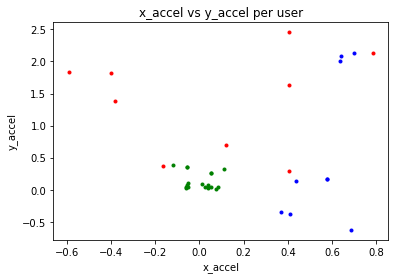

In [25]:
# X and Y values by user
plt.plot(data_p1['x_accel'], data_p1['y_accel'], "r.", label='tester 1')
plt.plot(data_p2['x_accel'], data_p2['y_accel'], "b.", label='tester 2')
plt.plot(data_p3['x_accel'], data_p3['y_accel'], "g.", label='tester 3')
plt.title('x_accel vs y_accel per user')
plt.xlabel('x_accel')
plt.ylabel('y_accel')
plt.show()

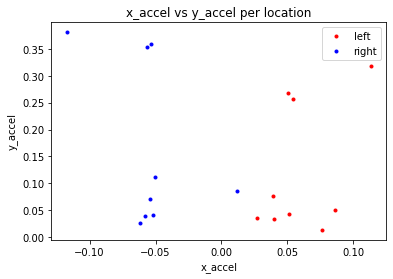

In [26]:
# X and Y values by side
plt.plot(data_left['x_accel'], data_left['y_accel'], "r.", label='left')
plt.plot(data_right['x_accel'], data_right['y_accel'], "b.", label='right')
plt.title('x_accel vs y_accel per location')
plt.xlabel('x_accel')
plt.ylabel('y_accel')
plt.legend()
plt.show()